In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import h5py
import joblib
drive.mount('/content/drive')
file_path="/content/drive/MyDrive/dataset_ts_light_version.hdf5"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
with h5py.File(file_path, 'r') as f:
  for key in f.keys():
    print(f"{key}: shape={f[key].shape}")

  X_train= f['x_train'][:]
  y_train= f['y_train'][:]

x_test: shape=(7766, 48, 48, 3)
x_train: shape=(90601, 48, 48, 3)
x_validation: shape=(31063, 48, 48, 3)
y_test: shape=(7766,)
y_train: shape=(90601,)
y_validation: shape=(31063,)


In [3]:
X = X_train.reshape(X_train.shape[0], -1)
means = X.mean(axis=1, keepdims=True)
stds = X.std(axis=1, keepdims=True) + 1e-8
X_standardized = (X-means)/stds
X_standardized[:5]
del X
del means
del stds

In [4]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_standardized)
  inertia.append(kmeans.inertia_)

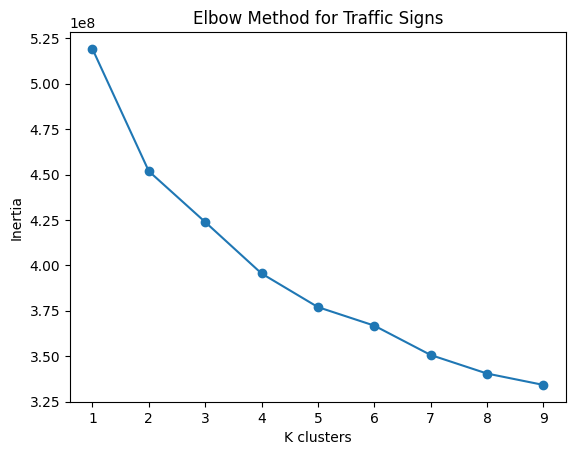

In [5]:
plt.scatter(range(1,10), inertia)
plt.plot(range(1,10), inertia)
plt.xlabel('K clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Traffic Signs')
plt.show()

In [11]:
kmeans_4 = KMeans(n_clusters=4)
#kmeans_4.fit(X_standardized)
#joblib.dump(kmeans_4, 'kmeans.pkl')

KeyboardInterrupt: 

In [12]:
kmeans_4 = joblib.load('kmeans.pkl')
y_kmeans = kmeans_4.labels_

In [13]:
def show_category(label):
  selected_images = X_train[y_kmeans[:] == label][:10]

  fig, axes = plt.subplots(1, 10, figsize=(10, 10))

  axes = axes.flatten()

  for i, img in enumerate(selected_images):
    axes[i].imshow(img.astype(np.uint8))
    axes[i].axis('off')


  for j in range(i + 1, len(axes)):
    axes[j].axis('off')

  plt.tight_layout()
  plt.show()

Label 0:


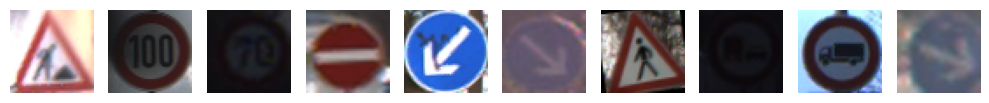

Label 1:


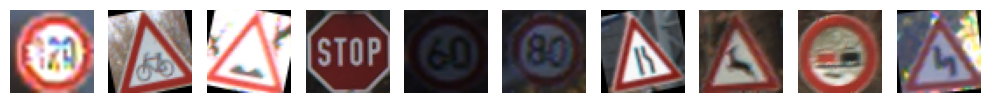

Label 2:


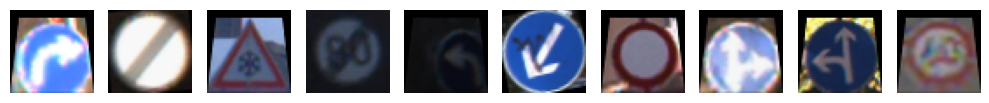

Label 3:


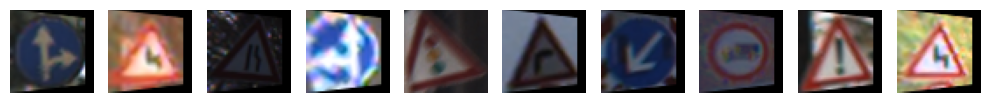

In [14]:
print("Label 0:")
show_category(0)
print("Label 1:")
show_category(1)
print("Label 2:")
show_category(2)
print("Label 3:")
show_category(3)